# The Mexican earthquake source parameter Database-Comparasions

In [1]:
ENV["PYTHON"]=""

""

In [1]:
using DataFrames
using GLM
using Plots
#import PyPlot

In [2]:
using LaTeXStrings

In [4]:
pyplot()

Plots.PyPlotBackend()

In [3]:
DataTo = readtable("BMPF-14junio2017Xyoli.csv");

In [4]:
DataGolfo = readtable("BMPF-14junio2017Golfo.csv");
DataSUB = readtable("BMPF-14junio2017SUBxyoli.csv");
DataTMVB = readtable("BMPF-14junio2017TMVB.csv")

,Evento,fecha,Tiempo,Lon,Lat,Prof,Magnitud,Mo,Caida_de_esfuerzos,freq_esc_,Radio,Desplamiento,Energía,Er_mo,strike,dip,rake,Lugar,none
1,2,1974-07-12,02:41:52.50,-99.2,19.21,7.0,3.8,5.34e14,5.33e6,5.47,0.16,0.2212,NA,NA,NA,NA,NA,TMVB,NA
2,3,1976-03-25,23:05:00.50,-99.33,20.4807,4.0,5.0,4.5e16,0.7,0.4,3.0,0.0531,NA,NA,242,64,-174,TMVB,NA
3,4,1976-10-04,06:59:16.41,-99.1458,20.4927,4.0,5.1,5.6e16,0.7,0.45,3.0,0.066,NA,NA,291,76,-25,TMVB,NA
4,42,1979-02-22,09:16:33,-100.1762,19.8936,8.19,5.5,1.75e17,8.236,0.635,2.02,0.4551,NA,NA,280,66,-48,TMVB,T
5,43,1979-02-22,10:38:00,-100.1909,19.9166,8.53,3.6,2.69e14,0.56,1.96,0.701,0.0058,NA,NA,NA,NA,NA,TMVB,T
6,44,1979-02-22,09:57:00,-100.2022,19.8738,4.96,3.4,1.38e14,0.06,1.26,1.005,0.0014,NA,NA,NA,NA,NA,TMVB,T
7,45,1979-02-22,10:26:00,-100.1773,19.8531,7.86,3.1,4.9e13,0.116,2.21,0.62,0.0014,NA,NA,NA,NA,NA,TMVB,T
8,46,1979-02-22,10:28:00,-100.135,19.8287,3.32,3.3,7.9e13,0.518,2.5,0.79,0.0013,NA,NA,NA,NA,NA,TMVB,T
9,47,1979-02-22,12:15:00,-100.1468,19.8853,9.72,3.3,9.02e13,0.613,3.16,0.4,0.006,NA,NA,NA,NA,NA,TMVB,T
10,48,1979-02-22,19:45:00,-100.1708,19.8352,4.96,3.9,7.95e14,0.405,1.17,1.12,0.0067,NA,NA,NA,NA,NA,TMVB,T


In [5]:
#DataTo[:Magnitud]=round.(dropna(DataTo[:Magnitud]),1);
DataGolfo[:Magnitud]=round.(dropna(DataGolfo[:Magnitud]),1);
DataSUB[:Magnitud]=round.(dropna(DataSUB[:Magnitud]),1);
DataTMVB[:Magnitud]=round.(dropna(DataTMVB[:Magnitud]),1);

In [6]:
sub = "MSZ"
golf = "GBC"
TM = "TMVB";

In [7]:
SUB1 = DataSUB[.~isna.(DataSUB[:Caida_de_esfuerzos]),:]; # Remove Stress Drop -->> NA


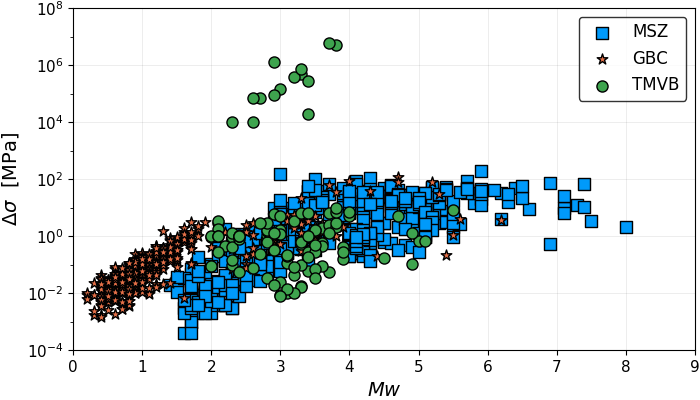

In [10]:
scatter((SUB1[:Magnitud]),(SUB1[:Caida_de_esfuerzos]),lab=sub, m=(8,:rect))
scatter!((DataGolfo[:Magnitud]),(DataGolfo[:Caida_de_esfuerzos]),lab=golf,m=(8,:star5))
scatter!((DataTMVB[:Magnitud]),(DataTMVB[:Caida_de_esfuerzos]),lab=TM,m=(8,:circle),
    xlabel=L"$Mw$", ylabel=L"$\Delta \sigma$  [MPa]",xlims=(0,9),xticks=(0:1:9),ylims=(10e-5,10e7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
yaxis!(:log10)
#PyPlot.savefig("MwvsStress.pdf",dpi=400)

In [11]:
SUB2 = SUB1[.~isna.(SUB1[:freq_esc_]),:]; # Remove Stress Drop and Fc -->> NA
TMVB1 = DataTMVB[.~isna.(DataTMVB[:freq_esc_]),:]; # # Remove Fc -->> NA


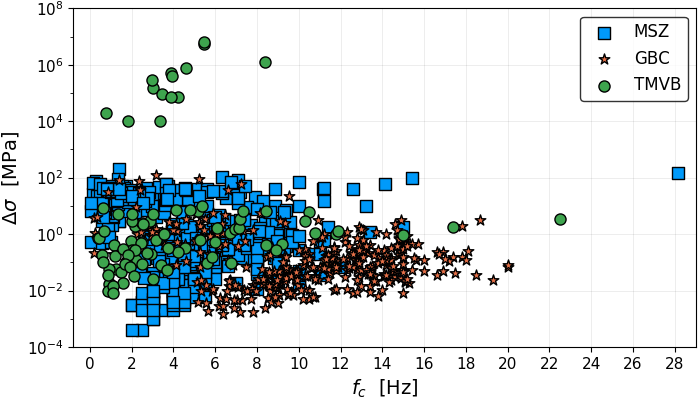

In [14]:
scatter((SUB2[:freq_esc_]),(SUB2[:Caida_de_esfuerzos]),yscale=:log10,lab=sub, m=(8,:rect))
scatter!((DataGolfo[:freq_esc_]),(DataGolfo[:Caida_de_esfuerzos]),yscale=:log10,lab=golf,m=(8,:star5))
scatter!((TMVB1[:freq_esc_]),(TMVB1[:Caida_de_esfuerzos]),yscale=:log10,lab=TM,m=(8,:circle),
    xlabel=L"$f_{c}$  [Hz]", ylabel=L"$\Delta \sigma$  [MPa]",xticks=(0:2:30),ylims=(10e-5,10e7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("FCvsStress.pdf",dpi=400)

In [15]:
SUB3 = DataSUB[.~isna.(DataSUB[:Prof]),:]; # Remove Depth -->> NA
Golfo1 = DataGolfo[.~isna.(DataGolfo[:Prof]),:];# Remove Depth -->> NA


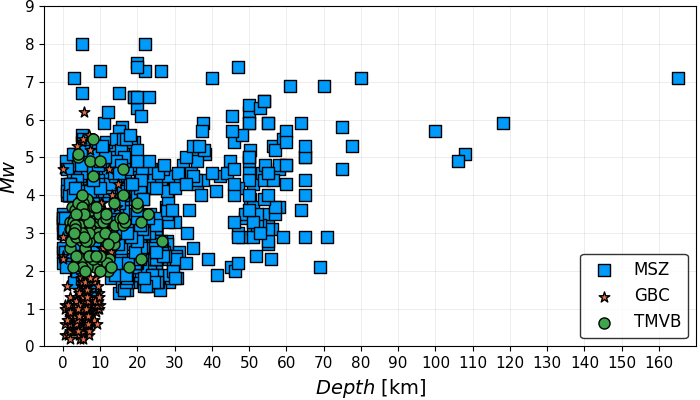

In [18]:
scatter((SUB3[:Prof]),(SUB3[:Magnitud]),lab=sub, m=(8,:rect))
scatter!((Golfo1[:Prof]),(Golfo1[:Magnitud]),lab=golf,m=(8,:star5))
scatter!((DataTMVB[:Prof]),(DataTMVB[:Magnitud]),lab=TM,m=(8,:circle),
    ylabel=L"$Mw$", xlabel=L"$Depth$ [km]",xticks=(0:10:180),ylims=(0,9),yticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsMw.pdf",dpi=400)

In [19]:
SUB4 = SUB1[.~isna.(SUB1[:Prof]),:]; # Remove Stress Drop and Depth -->> NA


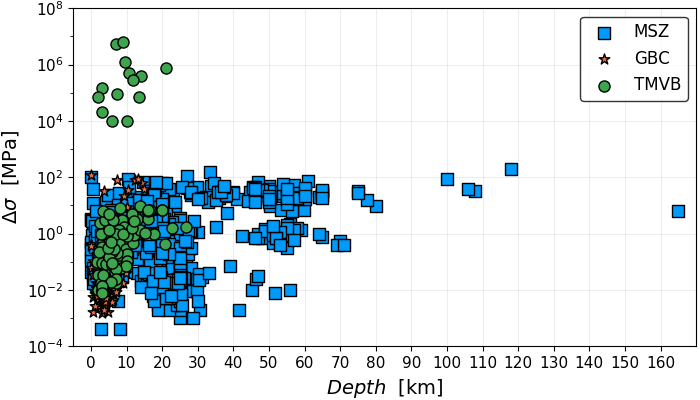

In [23]:
scatter((SUB4[:Prof]),(SUB4[:Caida_de_esfuerzos]),yscale=:log10,lab=sub, m=(8,:rect))
scatter!((Golfo1[:Prof]),(Golfo1[:Caida_de_esfuerzos]),yscale=:log10,lab=golf,m=(8,:star5))
scatter!((DataTMVB[:Prof]),(DataTMVB[:Caida_de_esfuerzos]),yscale=:log10,lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$\Delta \sigma$  [MPa]",xticks=(0:10:180),ylims=(10e-5,10e7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsStress.pdf",dpi=400)

In [24]:
SUB5 = SUB3[.~isna.(SUB3[:freq_esc_]),:]; # Remove Depth and Fc --->> NA


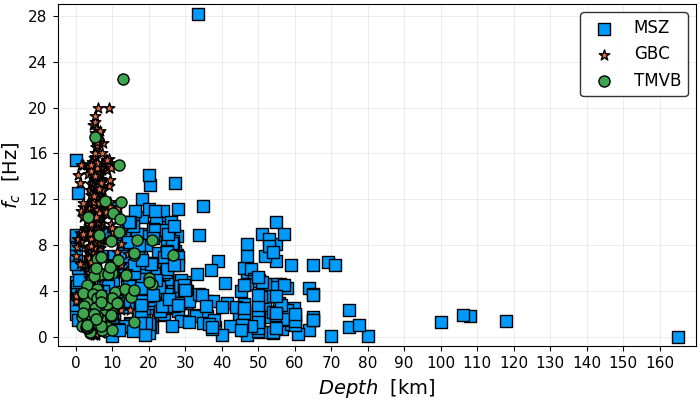

In [27]:
scatter((SUB5[:Prof]),(SUB5[:freq_esc_]),lab=sub, m=(8,:rect))
scatter!((Golfo1[:Prof]),(Golfo1[:freq_esc_]),lab=golf,m=(8,:star5))
scatter!((TMVB1[:Prof]),(TMVB1[:freq_esc_]),lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$f_{c}$  [Hz]",xticks=(0:10:180),yticks=(0:4:30),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14),)
#PyPlot.savefig("DepthvsFC.pdf",dpi=400)


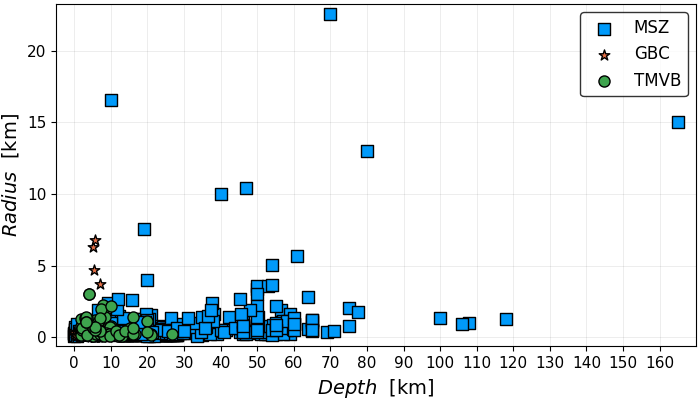

In [30]:
scatter((SUB5[:Prof]),(SUB5[:Radio]),lab=sub, m=(8,:rect))
scatter!((Golfo1[:Prof]),(Golfo1[:Radio]),lab=golf,m=(8,:star5))
scatter!((TMVB1[:Prof]),(TMVB1[:Radio]),lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$Radius$  [km]",xticks=(0:10:180),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsRadius.pdf",dpi=400)


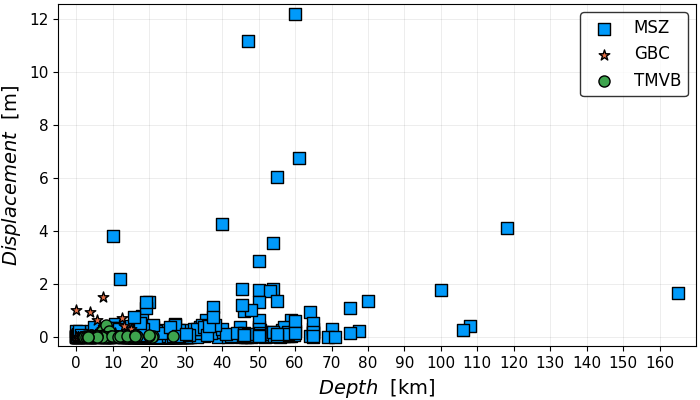

In [33]:
scatter((SUB5[:Prof]),(SUB5[:Desplamiento]),lab=sub, m=(8,:rect))
scatter!((Golfo1[:Prof]),(Golfo1[:Desplamiento]),lab=golf,m=(8,:star5))
scatter!((TMVB1[:Prof]),(TMVB1[:Desplamiento]),lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$Displacement$  [m]",xticks=(0:10:180),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsDispla.pdf",dpi=400)

In [34]:
# Er_Mo Figure
SUBErMo = DataSUB[.~isna.(DataSUB[:Er_mo]),:]; # Remove Er_Mo -->> NA
TMVErMo = DataTMVB[.~isna.(DataTMVB[:Er_mo]),:]; # Remove Er_Mo -->> NA


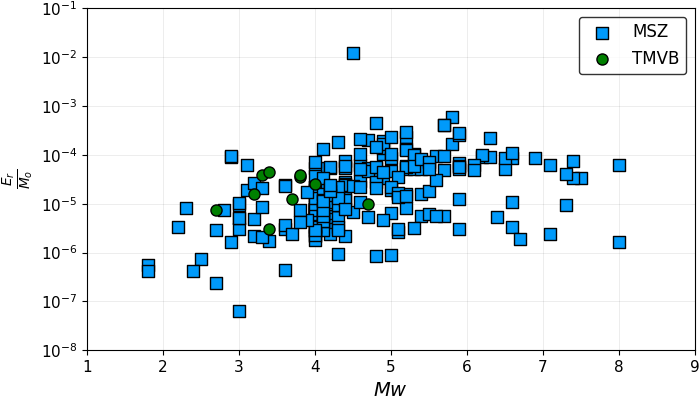

In [37]:
scatter((SUBErMo[:Magnitud]),(SUBErMo[:Er_mo]),lab=sub, m=(8,:rect))
scatter!((TMVErMo[:Magnitud]),(TMVErMo[:Er_mo]),lab=TM,m=(8,:circle,:green),
    xlabel=L"$Mw$", ylabel=L"$\frac{E_{r}}{M_{o}}$",xlims=(1,9),xticks=(1:1:9),ylims=(10e-9,10e-2),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
yaxis!(:log10)
#PyPlot.savefig("MwvsErMo.pdf",dpi=400)